# Cómputo de Alto Desempeño ~ Semana 3
Ricardo Montes Estrada
[rmontes.mca16@lania.edu.mx](mailto:rmontes.mca16@lania.edu.mx)

## Ejercicios
---

In [1]:
import numpy as np
import ipyparallel as ipp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rc = ipp.Client()
rc.ids

[0, 1, 2, 3]

In [3]:
rc[:]

<DirectView [0, 1, 2, 3]>

In [4]:
dview = rc[:]

In [5]:
rc[1:3].apply_sync(lambda: 'Hola clase de MCA')

['Hola clase de MCA', 'Hola clase de MCA']

In [6]:
rc[0].map_sync(lambda x,y,z: x+y+z, [1], [2], [3])

[6]

In [7]:
rc[0].map_sync(lambda x,y,z: x+y+z, range(10), range(10), range(10))

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [8]:
n = 13
x = 2**n-1

In [9]:
range(int(x**0.5)+1)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90]

In [10]:
np.arange(int(x**0.5)+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [11]:
%%timeit
for i in np.arange(int(x**0.5)+1)[2:]:
    x % i

100000 loops, best of 3: 18.9 µs per loop


In [12]:
%%timeit
x=2**13
for i in np.arange(int(x**0.5)+1)[2:]:
    x % i

100000 loops, best of 3: 18.3 µs per loop


In [13]:
PrimeQ = lambda x: all(x % i != 0 for i in np.arange(int(x**0.5)+1)[2:] and x > 1)

In [14]:
def PrimeQA(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[2:])

In [15]:
PrimeQA(2**7)

False

In [16]:
rc[0].apply_sync(PrimeQA, 2**7)

False

In [17]:
rc[:].apply_sync(PrimeQA, 2**7)

[False, False, False, False]

In [18]:
dview.map_sync(PrimeQA, 2**np.arange(7))

[True, True, False, False, False, False, False]

In [19]:
%timeit dview.map_sync(PrimeQA, 2**np.arange(25))

100 loops, best of 3: 15.2 ms per loop


In [20]:
np.array([x % i for i in np.arange(np.int(x**0.5)+1)[2:]])

array([ 1,  1,  3,  1,  1,  1,  7,  1,  1,  7,  7,  1,  1,  1, 15, 14,  1,
        2, 11,  1,  7,  3,  7, 16,  1, 10, 15, 13,  1,  7, 31,  7, 31,  1,
       19, 14, 21,  1, 31, 32,  1, 21,  7,  1,  3, 13, 31,  8, 41, 31, 27,
       29, 37, 51, 15, 40, 13, 49, 31, 17,  7,  1, 63,  1,  7, 17, 31, 49,
        1, 26, 55, 15, 51, 16, 59, 29,  1, 54, 31, 10, 73, 57, 43, 31, 21,
       13,  7,  3,  1])

In [21]:
def PrimeQB(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(int(x**0.5)+1)[2:]]))

In [22]:
%timeit dview.map_sync(PrimeQB, 2**np.arange(25))

100 loops, best of 3: 16.5 ms per loop


In [23]:
np.arange(24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [24]:
np.mod(np.arange(24), 12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [25]:
np.array([hora % 12 for hora in np.arange(24)])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [26]:
for med in np.arange(12, 20):
    print np.mod(np.arange(24), med)

[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12  0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0  1  2  3  4  5  6  7  8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  0  1  2  3  4  5  6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17  0  1  2  3  4  5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18  0  1  2  3  4]


In [27]:
def PrimeQC(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x, lista)
    return np.all(residuos)

In [28]:
%timeit dview.map_sync(PrimeQC, 2**np.arange(25))

100 loops, best of 3: 15.3 ms per loop


---
**Tiempos para `PrimeQA`**

```python
def PrimeQA(x):
    import numpy as np
    return all(x % i for i in np.arange(int(x**0.5)+1)[2:])
```

In [29]:
size = range(26)[1:]

In [30]:
times_a = []
for n in size:
    timeit = %timeit -o dview.map_sync(PrimeQA, 2**np.arange(n))
    times_a.append(timeit.best)

100 loops, best of 3: 5.64 ms per loop
100 loops, best of 3: 8.53 ms per loop
100 loops, best of 3: 11.9 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 15.1 ms per loop
100 loops, best of 3: 15.6 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.1 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.5 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.5 ms per loop
100 loops, best of 3: 15.6 ms per loop
100 loops, best of 3: 15.6 ms per loop
100 loops, best of 3: 15.7 ms per loop
100 loops, best of 3: 15.7 ms per loop


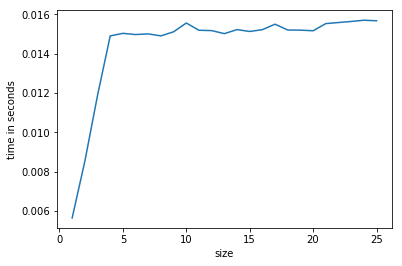

In [31]:
plt.plot(size, times_a, label='PrimeQA')
plt.xlabel('size')
plt.ylabel('time in seconds')

---
**Tiempos para `PrimeQB`**

```python
def PrimeQB(x):
    import numpy as np
    return np.all(np.array([x % i for i in np.arange(int(x**0.5)+1)[2:]]))
```

In [32]:
size = range(26)[1:]

In [33]:
times_b = []
for n in size:
    timeit = %timeit -o dview.map_sync(PrimeQB, 2**np.arange(n))
    times_b.append(timeit.best)

100 loops, best of 3: 5.51 ms per loop
100 loops, best of 3: 8.36 ms per loop
100 loops, best of 3: 11.6 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.7 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15.1 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15.1 ms per loop
100 loops, best of 3: 15.1 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15.2 ms per loop
100 loops, best of 3: 15.3 ms per loop
100 loops, best of 3: 15.5 ms per loop


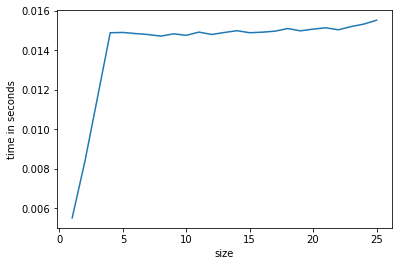

In [34]:
plt.plot(size, times_b, label='PrimeQB')
plt.xlabel('size')
plt.ylabel('time in seconds')

---
**Tiempos para `PrimeQC`**

```python
def PrimeQC(x):
    import numpy as np
    lista = np.arange(np.int(x**0.5)+1)[2:]
    residuos = np.mod(x, lista)
    return np.all(residuos)
```

In [35]:
size = range(26)[1:]

In [36]:
times_c = []
for n in size:
    timeit = %timeit -o dview.map_sync(PrimeQC, 2**np.arange(n))
    times_c.append(timeit.best)

100 loops, best of 3: 5.5 ms per loop
100 loops, best of 3: 8.47 ms per loop
100 loops, best of 3: 11.7 ms per loop
100 loops, best of 3: 14.7 ms per loop
100 loops, best of 3: 14.7 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.7 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 14.9 ms per loop
100 loops, best of 3: 15.1 ms per loop
100 loops, best of 3: 14.8 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 15 ms per loop
100 loops, best of 3: 14.9 ms per loop


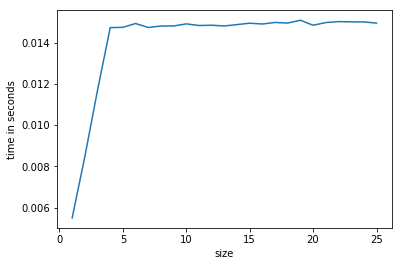

In [37]:
plt.plot(size, times_c, label='PrimeQC')
plt.xlabel('size')
plt.ylabel('time in seconds')

---
**Gráfica comparativa**

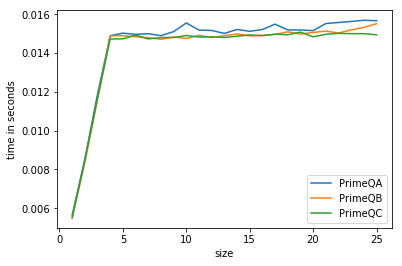

In [39]:
plt.plot(size, times_a, label='PrimeQA')
plt.plot(size, times_b, label='PrimeQB')
plt.plot(size, times_c, label='PrimeQC')
plt.xlabel('size')
plt.ylabel('time in seconds')
plt.legend()